In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from IPython.display import IFrame
from IPython.core.display import display
import os
import time
import seaborn as sns

In [3]:
### Load the data that is time ready for machine learning code.
def read_crime_data():
    
    file = os.path.join('../Resources','data_ready_feed_ml.csv')
    crime_df = pd.read_csv(file)
    return crime_df

In [4]:
df_cleaned=read_crime_data()

In [4]:
df_cleaned.head(3)

,ID,Date,IUCR,CrimeType,Location Description,Arrest,Domestic,Ward,Community Area,FBI Code,...,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,OnlyDate,Time,time_hour,hourofday,sin_time,cos_time
0,11859143,10/12/2019 11:58:00 PM,1310,CRIMINAL DAMAGE,APARTMENT,0,0,6.0,67.0,14,...,32.0,23.0,17.0,216.0,2019-10-12,11:58:00 PM,23:58:00,23,-2.449294e-16,1.0
1,11859039,10/12/2019 11:57:00 PM,2092,NARCOTICS,PARKING LOT/GARAGE(NON.RESID.),1,0,28.0,26.0,18,...,23.0,30.0,16.0,82.0,2019-10-12,11:57:00 PM,23:57:00,23,-2.449294e-16,1.0
2,11859098,10/12/2019 11:55:00 PM,454,BATTERY,STREET,0,0,24.0,29.0,08B,...,14.0,57.0,21.0,153.0,2019-10-12,11:55:00 PM,23:55:00,23,-2.449294e-16,1.0


### Checking my data to make sure we have time value converted corectly

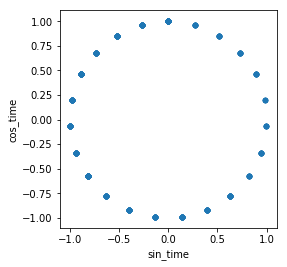

In [5]:
df_cleaned.sample(500).plot.scatter('sin_time','cos_time').set_aspect('equal')

## How many rows and columns have we got?

In [6]:
df_cleaned.shape

(6286967, 27)

In [8]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
#from shapely.geometry import MultiPoint

coords = df_cleaned.as_matrix(columns=['Latitude', 'Longitude'])

C:\Users\divya\Anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [9]:
print(coords)

[[ 41.76779521 -87.65782603]
 [ 41.88074849 -87.72388171]
 [ 41.85620984 -87.71269511]
 ...
 [ 41.98623    -87.66456273]
 [ 41.78905274 -87.65367933]
 [ 41.87703581 -87.73859365]]


### Running DBSCAN for all rows leads to memory error. So we divide the dataset into two.

In [28]:
df_part1 = df_cleaned[0:500]

In [29]:
df_part1.shape

(500, 27)

In [30]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
#from shapely.geometry import MultiPoint

coords = df_cleaned.as_matrix(columns=['Latitude', 'Longitude'])

C:\Users\divya\Anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [31]:
kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))


MemoryError: 

## I’ve got no clusters. Unlike k-means, DBSCAN doesn’t require you to specify the number of clusters in advance – it determines them automatically based on the epsilon and min_samples parameters.

##All I have memory error. 